In [1]:
import cv2
import numpy as np
import math
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt

In [2]:
distThresh=30

## Load images and detect keypoints

In [3]:
img1 = cv2.imread('./data/goodLeft.jpg',0)
img2 = cv2.imread('./data/goodRight.jpg',0)

# Initiate ORB detector
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None) 

img1 = cv2.drawKeypoints(img1, kp1, None)
img2 = cv2.drawKeypoints(img2, kp2, None)

## BruteForce Matching with Norm Hamming

matches:  259


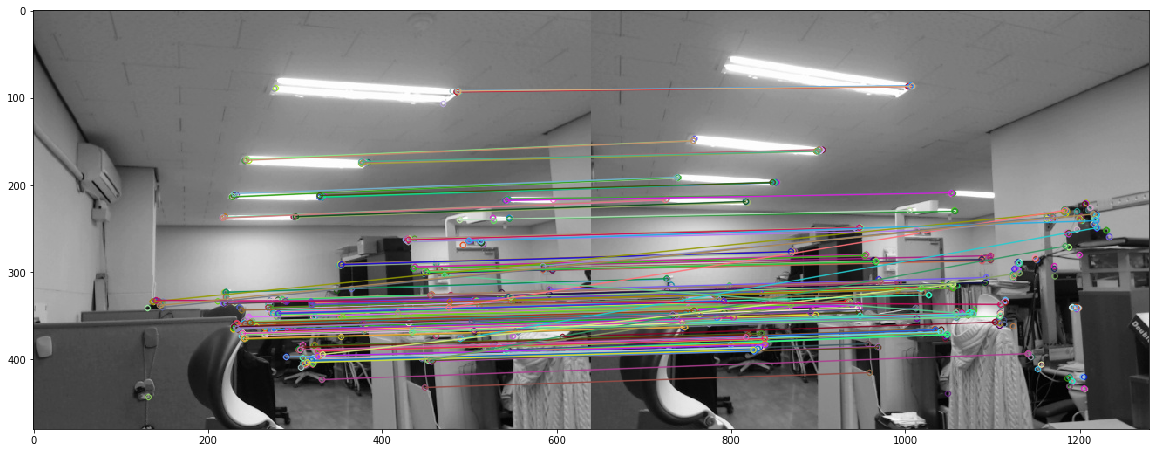

In [4]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:], None, flags=2)
plt.figure(figsize=(20,10))
plt.imshow(img3)
print("matches: ", len(matches))

## Filter some suspicious pairs

pairs:  259
pairs:  231


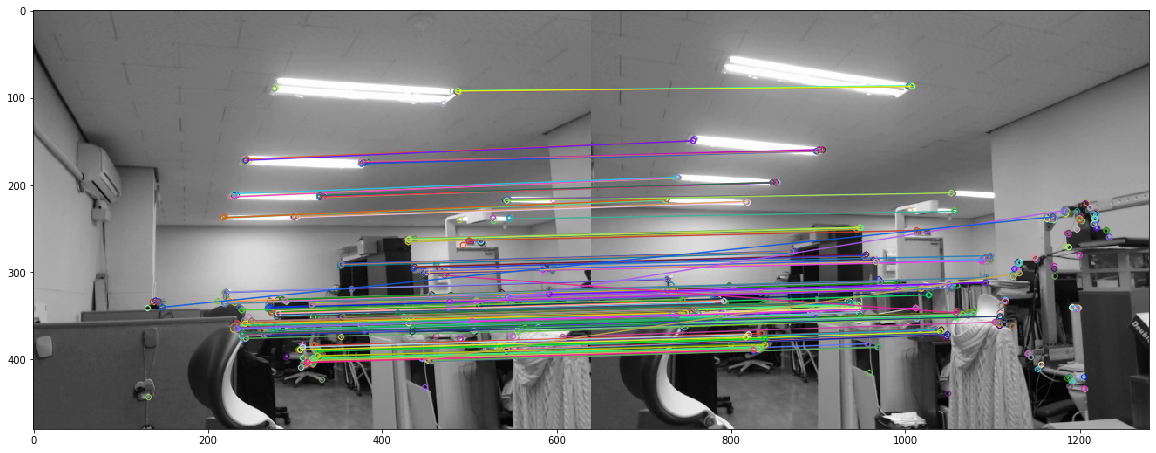

In [5]:
print("pairs: ",len(matches))

for item in matches:
    if item.distance>distThresh:
        matches.remove(item)
        
print("pairs: ",len(matches))

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:], None, flags=2)
plt.figure(figsize=(20,10))
plt.imshow(img3)

## Return pairs

In [6]:
Left=[]
Right=[]
for idx in range(len(matches)):
    Left.append(kp1[matches[0].queryIdx].pt)
    Right.append(kp2[matches[0].queryIdx].pt)


In [7]:
def MatchedKeyPoint(img1, img2):

    # Initiate ORB detector
    orb = cv2.ORB_create()
    
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None) 

    img1 = cv2.drawKeypoints(img1, kp1, None)
    img2 = cv2.drawKeypoints(img2, kp2, None)

    ## bf matchi g with norm hamming
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x:x.distance)
    
    ## filter some matches with far difference
    for item in matches:
        if item.distance>distThresh:
            matches.remove(item)
            
    ## return pairs
    Left=[]
    Right=[]
    for idx in range(len(matches)):
        Left.append(kp1[matches[0].queryIdx].pt)
        Right.append(kp2[matches[0].queryIdx].pt)
        
    return Left, Right

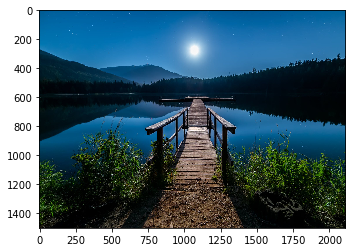

In [210]:
src = cv2.imread(filename, cv2.IMREAD_COLOR)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.show()

In [211]:
def Interpolation(x1, x2, d1, d2):
    return d2*x1+d1*x2

In [212]:
def BilinearInterpolation(src, dest_height, dest_width):
    src_height,src_width=src.shape[:2]
                
    dest = np.array([[[0]*3 for j in range(dest_width)] for i in range(dest_height)]).astype(np.uint8)
    for i in range(dest_height):
        for j in range(dest_width):
            x=i*(src_height-1)/(dest_height-1)
            y=j*(src_width-1)/(dest_width-1)
            
            x1=int(math.floor(x))
            x2=int(math.ceil(x))
            y1=int(math.floor(y))
            y2=int(math.ceil(y))
            
            h1=x-x1
            h2=1-h1
            w1=y-y1
            w2=1-w1

            i1 = Interpolation(src[x1][y1], src[x2][y1], h1, h2).astype(np.uint8)
            i2 = Interpolation(src[x1][y2], src[x2][y2], h1, h2).astype(np.uint8)
            dest[i][j]=Interpolation(i1, i2, w1, w2).astype(np.uint8)

    return dest


In [213]:
dest = BilinearInterpolation(src, height, width)


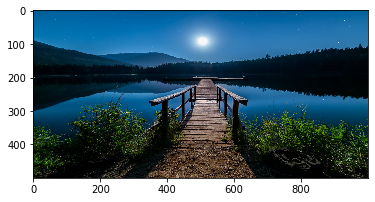

In [214]:
plt.imshow(dest)
matplotlib.image.imsave(filename.split('.')[0]+"_resized_"+str(height)+"x"+str(width)+"."+filename.split('.')[1], dest)
